## Using Monte Carlo to get simulated data
#### done in numpy first

In [1]:
# import libraries we need
%pylab inline
import metropolis

Populating the interactive namespace from numpy and matplotlib


ModuleNotFoundError: No module named '_metropolis'

In [183]:
# set parameters
dt = 2.34e-9
tmax = 400e-9
Nbin = 215
R = 1/(20*Nbin)
Nco = 1/R*1
n = 0

'''
dt -> time bin size in ns
tmax -> max time delay in ns
Nbin -> number of bins
R -> co-detection rate per bin
Nco -> total detections
n -> number of count
'''

'\ndt -> time bin size in ns\ntmax -> max time delay in ns\nNbin -> number of bins\nR -> co-detection rate per bin\nNco -> total detections\nn -> number of count\n'

In [184]:
# build up the probability function
egR = 20e6
geR = 20e6
emR = 10e6
mgR = 7e6
lambda1 = egR + geR
lambda2 = mgR + (emR*geR/lambda1)
a = lambda2/mgR - 1
g2_0 = 0.5 # we assume
r_bg = 1 - np.sqrt(1-g2_0)
n0 = 0

def P(n):
    if n.any()==0:
        P = R*r_bg + R * (1-r_bg) * (1 - (1+a)*np.exp((-0.25)*dt*lambda1) + a*np.exp((-0.25)*dt*lambda2) )
    else:
        P = R*r_bg + R * (1-r_bg) * \
        (1 - (1+a)*np.exp((-1)*abs(n-n0+0.5)*dt*lambda1) + a*np.exp((-1)*abs(n-n0+0.5)*dt*lambda2) )
    return P

In [185]:
# setup events
p1 = n
p2 = []
binlist = []
p=P(np.arange(Nbin))
p /= np.sum(p)

for i in np.arange(Nbin):
    binlist.append(i)

for i in np.arange(Nco):
    p2det = np.random.choice(np.arange(Nbin),p=p)
    p2.append(p2det)
p2 = np.stack(p2)

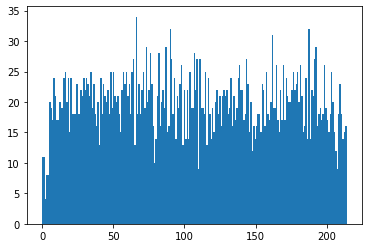

In [186]:
arr1=plt.hist(p2,bins=Nbin)


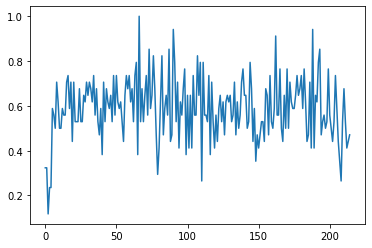

In [187]:
plt.plot(arr1[0]/np.max(arr1[0]))